# Métricas

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../regresion_logistica/ficheros/loan_balanceado.csv", index_col = 0)
df.head()

,dependents,education,self_employed,loan_amount_term,credit_history,applicantincome,coapplicantincome,loanamount,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban,loan_status
0,3,2,2,3,1,0.311983,-0.613757,-0.181121,0,1,1,0,0,0,1,1
1,2,2,2,3,1,-0.079844,-0.025836,-0.181121,0,1,0,1,1,0,0,0
2,3,2,1,3,1,-0.569782,-0.613757,-1.021461,0,1,0,1,0,0,1,1
3,3,1,2,3,1,-0.698843,0.305552,-0.289552,0,1,0,1,0,0,1,1
4,3,2,2,3,1,0.358718,-0.613757,-0.004921,0,1,1,0,0,0,1,1


In [3]:
X1 = df.drop("loan_status", axis = 1)
y1 = df["loan_status"]

In [4]:
X1

,dependents,education,self_employed,loan_amount_term,credit_history,applicantincome,coapplicantincome,loanamount,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,3,2,2,3,1,0.311983,-0.613757,-0.181121,0,1,1,0,0,0,1
1,2,2,2,3,1,-0.079844,-0.025836,-0.181121,0,1,0,1,1,0,0
2,3,2,1,3,1,-0.569782,-0.613757,-1.021461,0,1,0,1,0,0,1
3,3,1,2,3,1,-0.698843,0.305552,-0.289552,0,1,0,1,0,0,1
4,3,2,2,3,1,0.358718,-0.613757,-0.004921,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,3,1,2,3,1,-0.879282,-0.613757,-0.181121,0,1,1,0,0,0,1
684,3,2,2,3,1,1.596717,-0.613757,0.984510,1,0,1,0,0,1,0
685,3,2,1,3,0,1.725469,-0.613757,0.618556,0,1,1,0,0,0,1
686,3,2,2,3,1,-0.924778,0.493469,-0.370875,0,1,1,0,1,0,0


In [5]:
y1

0      1
1      0
2      1
3      1
4      1
      ..
683    0
684    0
685    0
686    0
687    0
Name: loan_status, Length: 688, dtype: int64

In [6]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

Ajustamos la predicción del modelo:

In [7]:
log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg_esta.fit(x_train1,y_train1)

y_pred_train_esta = log_reg_esta.predict(x_train1)

y_pred_test_esta = log_reg_esta.predict(x_test1)

Matriz de confusión:

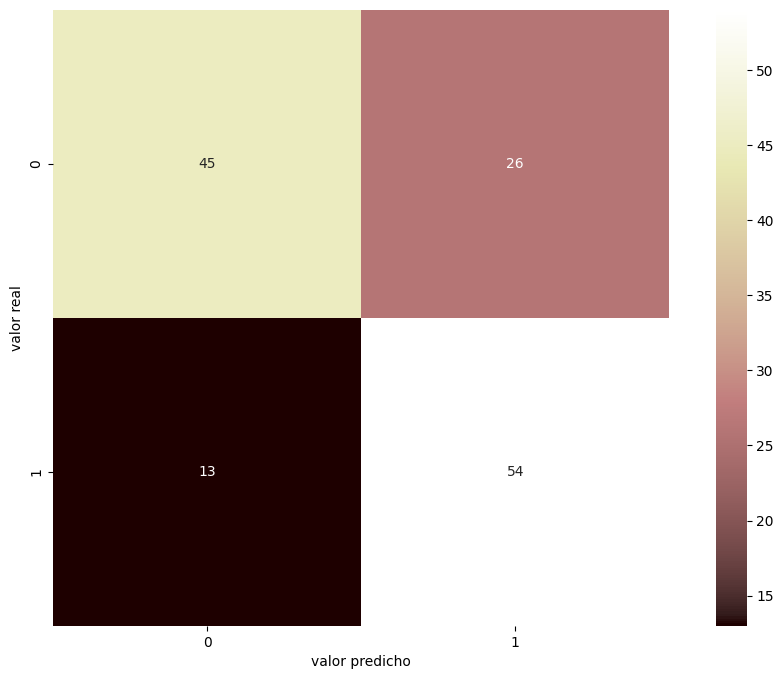

In [8]:
mat_lr_esta = confusion_matrix(y_test1, y_pred_test_esta)


plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta, square=True, annot=True, fmt="d", cmap = "pink")


plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Sacamos las métricas:

In [9]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
   
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df


Llamamos a la función:

In [10]:
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica estandar")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.717391,0.675000,0.805970,0.734694,0.437382,test,Regresión logistica estandar
1,0.756364,0.710914,0.870036,0.782468,0.511901,train,Regresión logistica estandar


Verdadero positivo: previsión de que te concedan el préstamo y ser concedido.

Falso positivo: predicción de que te concedan el préstamo y que finalmente sea denegado.

Verdadero negativo: previsión de denegación del préstamo y que efectívamente sea denegado.

Falso negativo: previsión de denegación del préstamo y ser aceptado. Este tipo de error sería el que más nos convendría en caso de no acertar.


Nuestro modelo muestra:

- 71% de accuracy (excatitud de predicción).
- 65% de precisión, predicciones positivas correctas (verdaderas y falsas).
- 83% de recall, de positivos capturados (VP y FN).
- La media entre la precisión y el recall (F1) es de 0.73.
- La especifidad no nos interesa especialmente (VN).
- Nuestro kappa (concordancia) es de 0.42, lo que quiere decir que es moderado.


A la vista de estos resultados, concluimos que este modelo de predicción (con datos estandarizados y codificados) no es el que mejor predice para nuestro conjunto de datos. Veremos si con las herramientas de Decission Tree y Random Forest podemos mejorar las métricas.

Apreciamos un ligero índice de overfitting que probablemente se puede desaparecer al implementar las herramientas mencionadas anteriormente.

Guardamos este dataframe para comparar:

In [11]:
results_logistic_esta.to_csv('../regresion_logistica/ficheros/metricas_estandarizadas.csv')